In [19]:
import nltk
import numpy as np
import xlsxwriter
from numpy import *
import matplotlib.pyplot as plt
nltk.download('gutenberg')
nltk.download('stopwords')
from nltk.corpus import stopwords, gutenberg
from nltk.collocations import TrigramCollocationFinder, TrigramAssocMeasures
from nltk import pos_tag, word_tokenize
texts = gutenberg.fileids()
stopWords = set(stopwords.words('english'))
words = []

[nltk_data] Downloading package gutenberg to /home/emile/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /home/emile/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
## 1.1 Compute the term frequencies for all the documents in the corpus

for text in texts:
    words += [w for w in gutenberg.words(text)]

frequencies = nltk.FreqDist([w for w in words if len(w) > 4 and w.lower() == w])

for e in frequencies.most_common(10):
    print (e[0], str(float(e[1]) / frequencies.N() * 100) + "%")

(u'shall', '1.84036267482%')
(u'which', '1.35505055535%')
(u'their', '1.20741671299%')
(u'there', '0.839376307258%')
(u'would', '0.631660792371%')
(u'could', '0.566759734355%')
(u'before', '0.535755020996%')
(u'house', '0.457841622141%')
(u'little', '0.453825467561%')
(u'people', '0.445471866034%')


(u'shall', '1.84036267482%')
(u'which', '1.35505055535%')
(u'their', '1.20741671299%')
(u'there', '0.839376307258%')
(u'would', '0.631660792371%')
(u'could', '0.566759734355%')
(u'before', '0.535755020996%')
(u'house', '0.457841622141%')
(u'little', '0.453825467561%')
(u'people', '0.445471866034%')


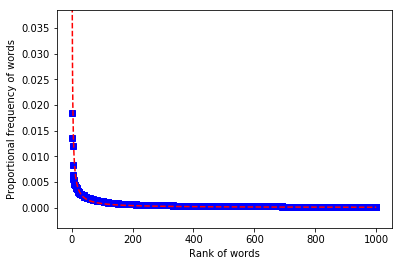

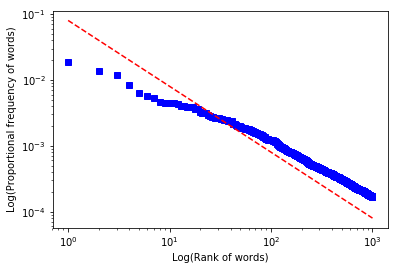

In [21]:
# 1.2 Verify that the word frequencies follow Zipf’s law, by plotting the frequency of the words
# vs. the rank of the words on a log-log scale. Plot the best-fitting Zipf distribution as well
# in the same figure.

words = [w for w in words if len(w) > 4]
words = [w for w in words if w.lower() == w]
frequencies = nltk.FreqDist(words)

for e in frequencies.most_common(10):
    print (e[0], str(float(e[1]) / frequencies.N() * 100) + "%")

best = []
freqs = frequencies.most_common(1000)
total_words = frequencies.N()
if len(frequencies) < 1000:
    t = np.arange(1, len(frequencies)+1)
else:
    t = np.arange(1, 1001)
t2 = np.true_divide(0.08, t)          #0.08 could be tweaked to any number around the highest frequency.

for key in freqs:
    best.append(float(key[1]) / total_words)

plt.plot(t, sorted(best, reverse=True), 'bs', t, t2, 'r--')
plt.ylim(top=best[0]+0.02)
plt.ylabel('Proportional frequency of words')
plt.xlabel('Rank of words')
plt.show()
plt.loglog(t, sorted(best, reverse=True), 'bs', t, t2, 'r--')
plt.ylabel('Log(Proportional frequency of words)')
plt.xlabel('Log(Rank of words)')
plt.show()

(u'shall ', '2.03572469382%')
(u'would ', '0.69871416691%')
(u'could ', '0.626923596352%')
(u'think ', '0.590139813913%')
(u'house ', '0.552467534314%')
(u'little ', '0.502000895605%')
(u'people ', '0.494182120594%')
(u'great ', '0.492049727409%')
(u'every ', '0.481565460917%')
(u'bring ', '0.407109398878%')


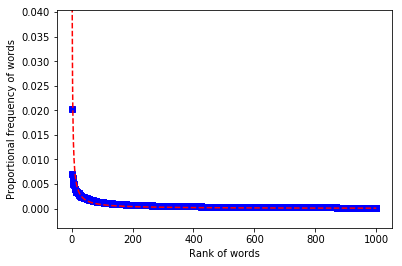

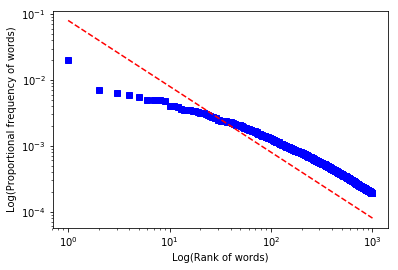

In [22]:
# 1.3 Clean up the data as much as possible. Things to consider:
#    • Removal of stopwords (‘that’, ‘is’, ‘a’, ‘god bless america’, etc.)
#    • Stemming / Lemmatization

words = [w for w in words if w.lower() not in stopWords]
words = [nltk.stem.WordNetLemmatizer().lemmatize(word,'v') + " " for word in words]
frequencies = nltk.FreqDist(words)

for e in frequencies.most_common(10):
    print (e[0], str(float(e[1]) / frequencies.N() * 100) + "%")

best = []
freqs = frequencies.most_common(1000)
total_words = frequencies.N()
if len(frequencies) < 1000:
    t = np.arange(1, len(frequencies)+1)
else:
    t = np.arange(1, 1001)
t2 = np.true_divide(0.08, t)

for key in freqs:
    best.append(float(key[1]) / total_words)

plt.plot(t, sorted(best, reverse=True), 'bs', t, t2, 'r--')
plt.ylim(top=best[0]+0.02)
plt.ylabel('Proportional frequency of words')
plt.xlabel('Rank of words')
plt.show()
plt.ylabel('Log(Proportional frequency of words)')
plt.xlabel('Log(Rank of words)')
plt.loglog(t, sorted(best, reverse=True), 'bs', t, t2, 'r--')
plt.show()

In [ ]:
# 1.4 Find the most frequent 10 collocations of three words in the corpus, in which at least two
# words are not proper names. What happens if you increase the size of the sliding window
# in which you are looking for collocations?
words = []
for text in texts:
    words += [w for w in gutenberg.words(text)]

i = 0
finder = TrigramCollocationFinder.from_words(words, 4)
finder.apply_freq_filter(2)
finder.apply_word_filter(lambda w: len(w) < 4 or w.lower() in stopWords)

trigram_measures = TrigramAssocMeasures()
collocations = finder.nbest(trigram_measures.likelihood_ratio, 100)
colloc_strings = [w1 + ' ' + w2 + ' ' + w3 for w1, w2, w3 in collocations]

for j in range(0, len(colloc_strings)):
    tokens = word_tokenize(colloc_strings[j])
    pos = pos_tag(tokens)
    if(pos[0][1] != 'NNP' and pos[1][1] != 'NNP' or pos[1][1] != 'NNP' and pos[2][1] != 'NNP' or pos[2][1] != 'NNP' and pos[0][1] != 'NNP'):
        if i < 10:
            print(pos)
            print(colloc_strings[i]+"\n")
            i += 1

In [ ]:
# Additional # This code shows the differences in window size. As you can
# see with this simple sentence, the normal Trigrams are fully connected
# for example 'do not like' while the Trigrams that are found with
# window size 4 shows for example 'do like green' between do and like was
# 'not' but because of the window size also a gap of one can be there between
# the Trigrams. For window_size 5 you can even see 'do green eggs' where 
# 'no like' is in the gap. By window_size 5 the best Trigram with a max span
# width of 5 is selected.

import nltk
from nltk.collocations import TrigramCollocationFinder, TrigramAssocMeasures

text = "I do not like green eggs and ham, I do not like them Sam I am!"
tokens = nltk.wordpunct_tokenize(text)
finder = TrigramCollocationFinder.from_words(tokens)
finder.apply_word_filter(lambda w: len(w) < 2)
trigram_measures = TrigramAssocMeasures()
print sorted(finder.nbest(trigram_measures.raw_freq, 4))
finder = TrigramCollocationFinder.from_words(tokens, window_size=4)
finder.apply_word_filter(lambda w: len(w) < 2)
trigram_measures = TrigramAssocMeasures()
print sorted(finder.nbest(trigram_measures.raw_freq, 4))
finder = TrigramCollocationFinder.from_words(tokens, window_size=5)
finder.apply_word_filter(lambda w: len(w) < 2)
trigram_measures = TrigramAssocMeasures()
print sorted(finder.nbest(trigram_measures.raw_freq, 4))

In [ ]:
# Additional # This code shows the matrix that can be made by having the top
# 'N' (50) words for every text and count in the rest of the texts how often
# this word is in that text. In the end it show all the words together and
# the frequencies of the word being in a certain text. Gutenberg exists of 18
# texts, so there are 18 columns.

fdist = [0] * len(texts)
wordsList = list()

N = 50

for i in range(0, len(texts)):
    words = [w for w in gutenberg.words(texts[i])]
    mostFrequent = nltk.FreqDist([w for w in words if len(w) > 4 and w.lower() == w]).most_common(N)
    fdist[i]=(mostFrequent)
    for word in mostFrequent:
        if word[0] not in wordsList:
            wordsList.append(word[0])


workbook = xlsxwriter.Workbook('FrequenciesPerText.xlsx')
worksheet = workbook.add_worksheet()
x = range(len(texts)*len(wordsList))
x = reshape(x, (len(wordsList), len(texts)))

for i in range(0, len(texts)):
    for j in range (0, len(wordsList)):
        if i == 0:
            worksheet.write(j+1, i, wordsList[j])
        for k in range(0, len(fdist[i])):
            if (fdist[i][k][0] == wordsList[j]):
                x[j][i] = fdist[i][k][1]
                worksheet.write(j+1, i+1, x[j][i])

print 'done'
workbook.close()